# Sobre o notebook

Aproveite esse espaço para as atividades do curso de **IA aplicada a Data Science: utilizando IA na construção de visualização de dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaços para adicionar o prompt que será utilizado para criar o código pelo ChatGPT e as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.


Logo abaixo, temos as url's onde estão localizadas as bases utilizadas no projeto juntamente com a url com dados que utilizaremos também no desafio

In [ ]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"
url_zoop_pay = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv"

## Aula 01 - Conhecendo os dados

### Mão na Massa - Zoop Pay

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

"tenho 3 bases de dados: url_clientes url_vendas url_zoop_pay concatene os dados de clientes e vendas em uma tabela com o nome df. Depois, concatene essa nova tabela com a base dos clientes pré-cadastrados no Zoop Pay, gerando assim a tabela consolidada com todos os dados."

In [3]:
import pandas as pd

# Leitura das bases
clientes = pd.read_csv(url_clientes)
vendas = pd.read_csv(url_vendas)
zoop_pay = pd.read_csv(url_zoop_pay)

# 1️⃣ Concatenar (merge) clientes + vendas
df = pd.merge(
    vendas,
    clientes,
    on='ID_compra',
    how='inner'
)

# 2️⃣ Concatenar a base consolidada com os clientes pré-cadastrados do Zoop Pay
df_consolidado = pd.concat(
    [df, zoop_pay],
    axis=0,
    ignore_index=True,
    sort=False
)

# Visualização inicial
df_consolidado.head()


,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra,zoop_pay
0,6.0,2023-01-03,20:40,Eletrônicos,4457.9,4.0,713.26,Boleto,6149,Porto Alegre,Rio Grande do Sul,Sul,30.0,Masculino,Sim,10.0,NaN
1,5.0,2023-01-03,21:48,Ferramentas e construção,115.9,1.0,0.00,PIX,9491,São Paulo,São Paulo,Sudeste,36.0,Masculino,Sim,8.0,NaN
2,9.0,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2.0,13.78,Cartão de Crédito,5288,Porto Velho,Rondônia,Norte,39.0,Feminino,Não,7.0,NaN
3,4.0,2023-01-03,14:29,Ferramentas e construção,80.9,5.0,40.45,PIX,9679,Recife,Pernambuco,Nordeste,35.0,Masculino,Sim,9.0,NaN
4,8.0,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4.0,0.00,PIX,1380,São Paulo,São Paulo,Sudeste,50.0,Masculino,Não,9.0,NaN


O que foi feito aqui (visão de analista)

merge:

Une dados de compra + perfil do cliente

Gera uma visão completa da transação

concat:

Incere clientes do Zoop Pay que ainda não compraram

Permite análises como:

Conversão de cadastrados → compradores

Perfil de clientes ativos vs inativos

sort=False:

Mantém as colunas sem reordenar automaticamente

ignore_index=True:

Gera um índice limpo e contínuo

🎯 Resultado final

Você agora tem uma base consolidada única, pronta para:

Análise de funil (cadastro → compra)

Segmentação de clientes

Dashboards de negócio

Storytelling executivo

## Aula 02 - Visualizando os dados

### Mão na Massa - Gerando visuais em relação a localidade

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Apartir de nossa base de dados "df_consolidado" um grafico visual que apresente o faturamento das vendas por região. o faturamento é dado pelo produto do valor unitário pela quantidade comprada somado ao frete.

voce vai usar as tabelas:

regiao = regiões 

categoria = categoria dos produtos

quantidade = quantidade vendida do produto

preco_unitario = preco dos produtos

frete = valor do frete

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [4]:
# Criando a coluna de faturamento
df_consolidado['faturamento'] = (
    df_consolidado['preco_unitario'] * df_consolidado['quantidade']
) + df_consolidado['frete']

# Faturamento total por região
faturamento_regiao = (
    df_consolidado
    .groupby('regiao')['faturamento']
    .sum()
    .sort_values(ascending=False)
)

faturamento_regiao


regiao
Sudeste         6833258.52
Nordeste        5249059.11
Sul             2454932.45
Centro-Oeste    1393880.91
Norte           1047876.52
Name: faturamento, dtype: float64

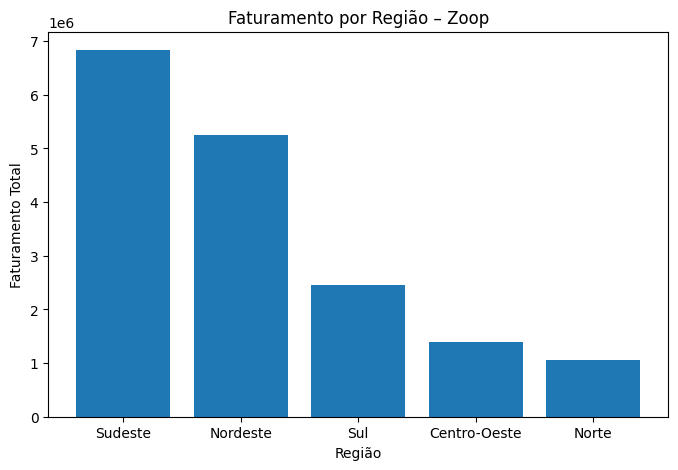

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.bar(
    faturamento_regiao.index,
    faturamento_regiao.values
)

plt.title('Faturamento por Região – Zoop')
plt.xlabel('Região')
plt.ylabel('Faturamento Total')

plt.show()


🧠 Por que esse gráfico é eficiente?

Gráfico de barras é ideal para:

Comparar categorias (regiões)

Identificar rapidamente líderes e oportunidades

Facilita perguntas como:

Qual região gera mais receita?

Onde investir mais em marketing ou logística?

➡️ Insight típico de storytelling:

“A região Sudeste concentra a maior parte do faturamento da Zoop, enquanto outras regiões apresentam potencial de crescimento.”

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Apartir de nossa base de dados "df_consolidado" crie um grafico visual que apresente a composição do publico por sexo biologico nos Estados de São Paulo e Rio de Janeiro. 

Dentro dessa base de dados tempos as colunas:


sexo_biologico = tipo 'Masculino' ou 'Feminino' 
uf = Estados como 'São Paulo' 

Empilhe ou agrupe esses dados, coloque as porcentagens para melhora da visualização e Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [8]:
# Filtrando os estados de interesse
df_estados = df_consolidado[df_consolidado['uf'].isin(['São Paulo', 'Rio de Janeiro'])]

# Contagem de clientes por estado e sexo
sexo_estado = (
    df_estados
    .groupby(['uf', 'sexo_biologico'])
    .size()
    .unstack(fill_value=0)
)


# Convertendo para percentual
sexo_estado_pct = sexo_estado.div(sexo_estado.sum(axis=1), axis=0) * 100

sexo_estado


sexo_biologico,Feminino,Masculino
uf,,
Rio de Janeiro,303,267
São Paulo,838,662


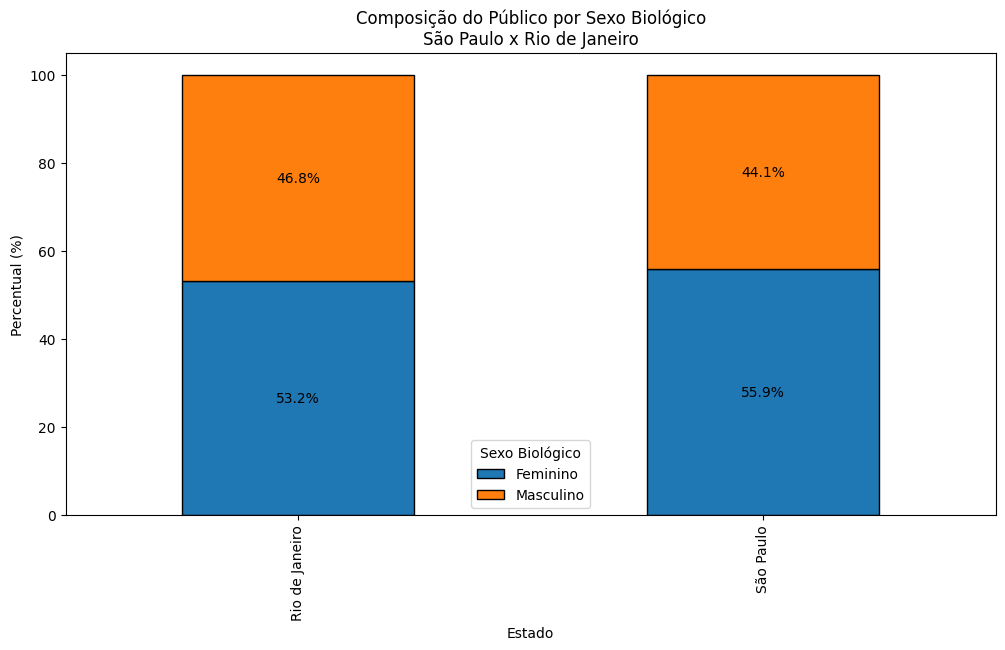

In [12]:
ax = sexo_estado_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    edgecolor='black'
)

plt.title('Composição do Público por Sexo Biológico\nSão Paulo x Rio de Janeiro')
plt.xlabel('Estado')
plt.ylabel('Percentual (%)')
plt.legend(title='Sexo Biológico')

# Adicionando os rótulos de percentual dentro das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()



🧠 Por que esse gráfico é o mais adequado?

Percentuais deixam o gráfico autoexplicativo e mais executivo.

Barras empilhadas permitem:

Comparar o total de clientes entre SP e RJ

Visualizar a composição interna por sexo

Ideal para responder:

Qual estado tem mais clientes?

A proporção entre masculino e feminino muda entre os estados?

➡️ Insight típico de storytelling:

“São Paulo concentra um volume maior de clientes, enquanto a distribuição por sexo biológico se mantém relativamente equilibrada entre os dois estados.”

## Aula 03 - Gerando mais visuais

### Mão na Massa - Perfil dos clientes

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

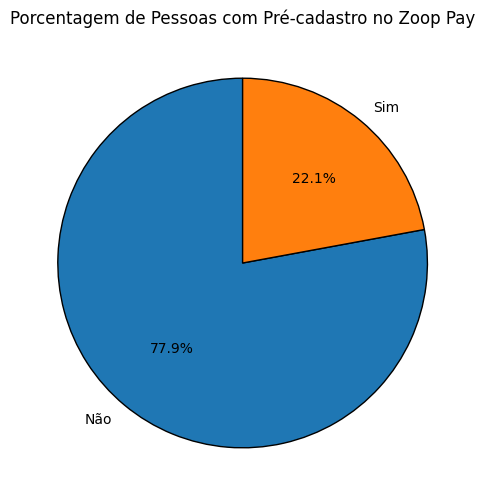

In [14]:
# Contagem de pré-cadastro
pre_cadastro = zoop_pay['zoop_pay'].value_counts()

plt.figure(figsize=(6, 6))

plt.pie(
    pre_cadastro.values,
    labels=pre_cadastro.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Porcentagem de Pessoas com Pré-cadastro no Zoop Pay')

plt.show()


🧠 Por que esse gráfico funciona bem?

Gráfico de pizza é ideal para:

Mostrar adesão vs não adesão

Comunicação rápida com stakeholders

O autopct deixa o insight explícito

O edgecolor='black' melhora a separação visual das fatias

➡️ Insight típico de negócio:

“Uma parcela significativa da base NÃO possui pré-cadastro no Zoop Pay, indicando falta de divulgação e esforço para chamar mais clientes para esta funcionalidade.”

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Apartir de nossa base de dados "df_consolidado", crie um visual que apresente a distribuição das idades dos clientes por região. Dentro dessa base de dados temos as colunas: idade = idade do clientes uf = Estados como 'São Paulo' Empilhe ou agrupe esses dados, coloque as porcentagens para melhora da visualização e Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [16]:
# Garantindo que idade é numérica
df_consolidado['idade'] = pd.to_numeric(df_consolidado['idade'], errors='coerce')

# Removendo idades nulas, se existirem
df_idade = df_consolidado.dropna(subset=['idade', 'regiao'])

# Criando faixas etárias
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']

df_idade['faixa_etaria'] = pd.cut(df_idade['idade'], bins=bins, labels=labels, right=False)


C:\Users\ADM\AppData\Local\Temp\ipykernel_15204\649057249.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idade['faixa_etaria'] = pd.cut(df_idade['idade'], bins=bins, labels=labels, right=False)


In [17]:
# Contagem por região e faixa etária
idade_regiao = (
    df_idade
    .groupby(['regiao', 'faixa_etaria'])
    .size()
    .unstack(fill_value=0)
)

# Convertendo para percentual (100%)
idade_regiao_pct = idade_regiao.div(idade_regiao.sum(axis=1), axis=0) * 100

idade_regiao_pct


C:\Users\ADM\AppData\Local\Temp\ipykernel_15204\4007198098.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['regiao', 'faixa_etaria'])


faixa_etaria,18–24,25–34,35–44,45–54,55–64,65+
regiao,,,,,,
Centro-Oeste,9.292929,31.919192,35.353535,16.969697,5.656566,0.808081
Nordeste,8.714134,26.939426,36.503719,22.104145,5.154091,0.584485
Norte,6.514658,25.732899,41.693811,19.869707,5.211726,0.977199
Sudeste,8.627157,25.956489,38.672168,21.380345,4.838710,0.525131
Sul,6.837607,31.135531,36.874237,20.024420,4.884005,0.244200


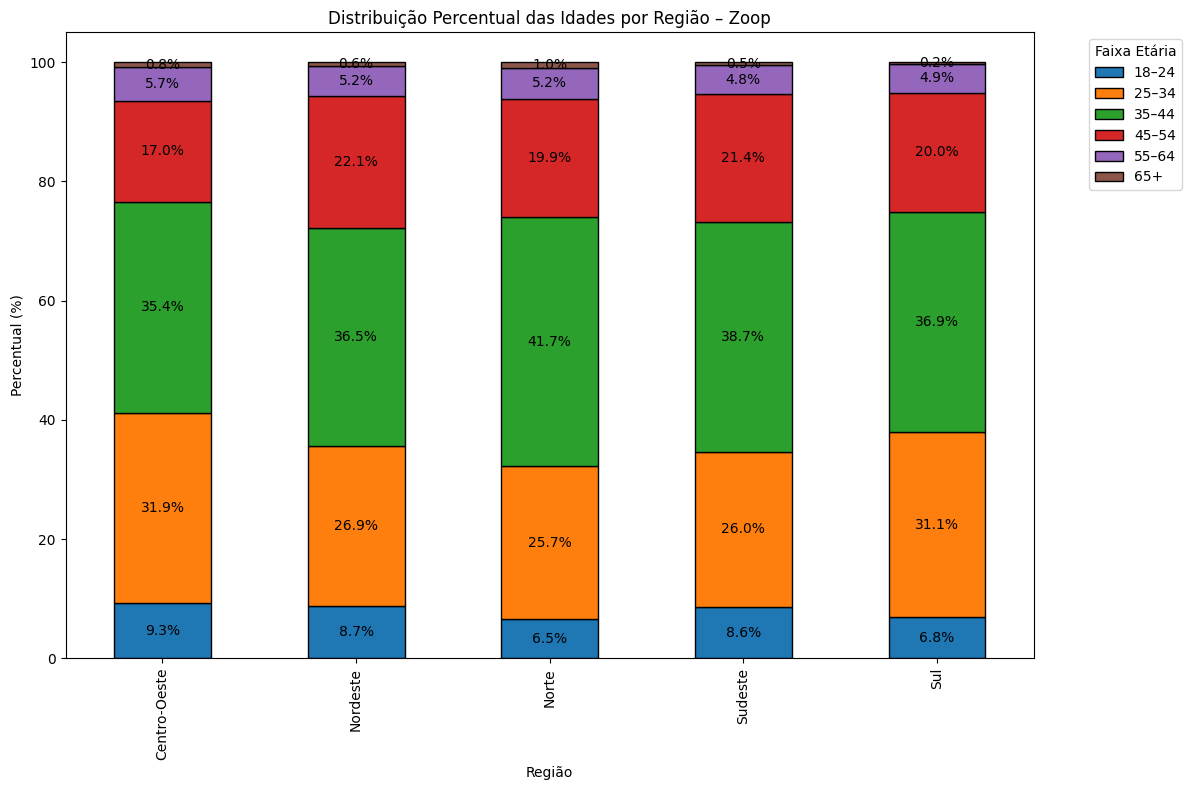

In [21]:
ax = idade_regiao_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    edgecolor='black'
)

plt.title('Distribuição Percentual das Idades por Região – Zoop')
plt.xlabel('Região')
plt.ylabel('Percentual (%)')
plt.legend(title='Faixa Etária', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionando rótulos de percentual
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()


🧠 Por que esse gráfico é o melhor para esse caso?

Barras empilhadas 100%:

Eliminam o efeito do volume absoluto

Facilitam comparação entre regiões

Faixas etárias tornam o insight mais acionável

Percentuais deixam o gráfico autoexplicativo e executivo

➡️ Insight típico de storytelling:

“A região Sudeste concentra maior proporção de clientes entre 25 e 34 anos, enquanto outras regiões apresentam perfil etário mais distribuído.”

## Aula 04 - Técnicas de storytelling

### Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua própria.

In [22]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

### Mão na Massa - Refinando os visuais escolhidos

#### Desafio 1:

##### Gráfico sem refinamento

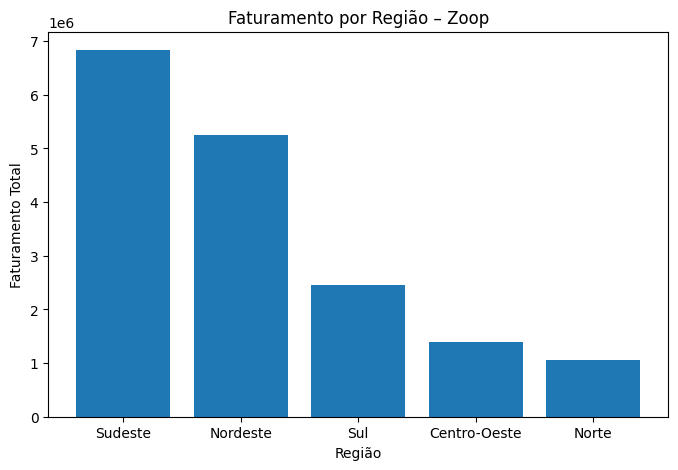

In [23]:

plt.figure(figsize=(8, 5))

plt.bar(
    faturamento_regiao.index,
    faturamento_regiao.values
)

plt.title('Faturamento por Região – Zoop')
plt.xlabel('Região')
plt.ylabel('Faturamento Total')

plt.show()

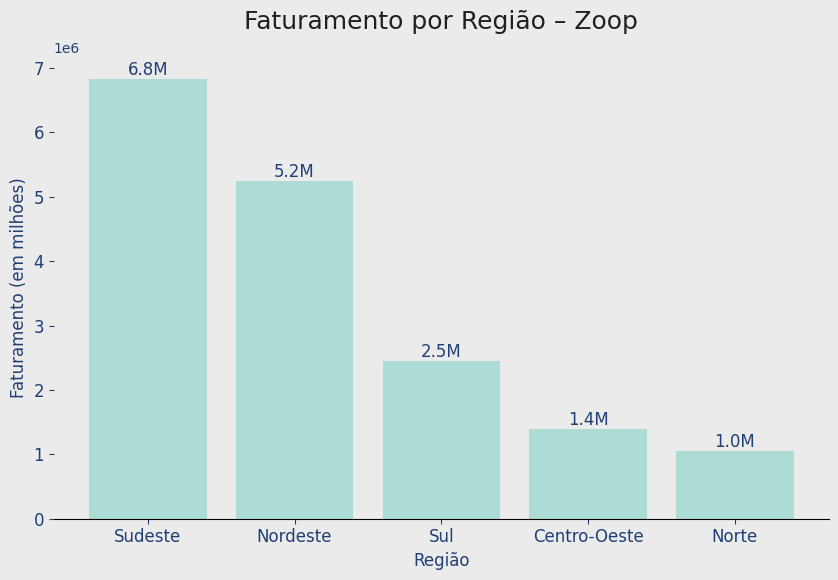

In [24]:
# Criando figura e eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Fundo da figura e do plot
fig.patch.set_facecolor(CINZA_1)
ax.set_facecolor(CINZA_1)

# Criando o gráfico de barras
bars = ax.bar(
    faturamento_regiao.index,
    faturamento_regiao.values,
    color=AQUA_1
)

# Título
ax.set_title(
    'Faturamento por Região – Zoop',
    fontsize=18,
    color=CINZA_5,
    pad=20
)

# Labels dos eixos
ax.set_xlabel('Região', fontsize=12, color=AZUL_1)
ax.set_ylabel('Faturamento (em milhões)', fontsize=12, color=AZUL_1)

# Ajustando rótulos dos eixos
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

# Removendo bordas (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Opcional: remover grid se existir
ax.grid(False)

# Adicionando valores nas barras (em milhões)
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height/1_000_000:.1f}M',
        ha='center',
        va='bottom',
        fontsize=12,
        color=AZUL_1
    )

plt.show()

🧠 O que foi refinado (visão de analista)

✔️ Fundo alinhado à identidade visual

✔️ Conversão dos valores para milhões, facilitando leitura executiva

✔️ Remoção de ruídos visuais (bordas desnecessárias)

✔️ Rótulos diretos nas barras eliminam dependência do eixo Y

✔️ Gráfico pronto para slide, dashboard ou relatório

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>


Preciso fazer um refinamento do grafico a seguir:

"plt.figure(figsize=(8, 5)) 

plt.bar(
    faturamento_regiao.index,
    faturamento_regiao.values
)

plt.title('Faturamento por Região – Zoop')
plt.xlabel('Região')
plt.ylabel('Faturamento Total')

plt.show()"

Plano de fundo da figura e da área do plot na cor CINZA_1


Cor das colunas em AQUA_1


Tamanho da figura de (10,6)


Altere o título da figura e seu tamanho para 18 e cor CINZA_5, ajuste os labels e rótulos do eixo x e y quando existirem para tamanho 12 e cor AZUL_1


Retire o máximo das bordas possível e ajuste os dados para serem apresentados nas barras na ordem de milhões na cor AZUL_1 e tamanho 12


#### Desafio 2:

##### Gráfico sem refinamento

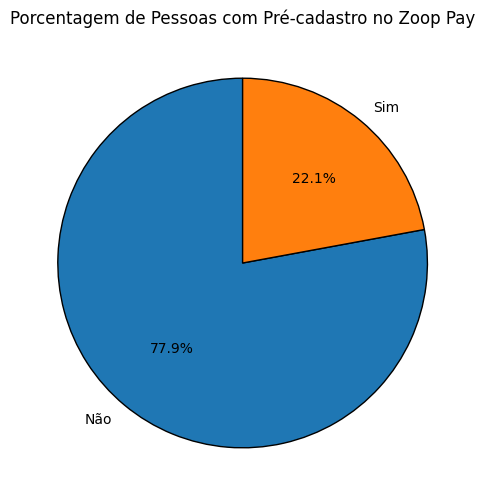

In [25]:
# Contagem de pré-cadastro
pre_cadastro = zoop_pay['zoop_pay'].value_counts()

plt.figure(figsize=(6, 6))

plt.pie(
    pre_cadastro.values,
    labels=pre_cadastro.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Porcentagem de Pessoas com Pré-cadastro no Zoop Pay')

plt.show()

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

preciso fazer o refinamento deste grafico:

"# Contagem de pré-cadastro
pre_cadastro = zoop_pay['zoop_pay'].value_counts()

plt.figure(figsize=(6, 6))

plt.pie(
    pre_cadastro.values,
    labels=pre_cadastro.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Porcentagem de Pessoas com Pré-cadastro no Zoop Pay')

plt.show()"

Plano de fundo da figura e da área do plot na cor CINZA_1


Cor das fatias de AZUL_1 para “Sim” e CINZA_3 para “Não”


Tamanho da figura de (6,6)


Altere o título da figura e seu tamanho para 18 e cor CINZA_5


Adicione os rótulos nas fatias com tamanho 12 e as porcentagem também em tamanho 12 e em negrito. As porcentagens devem estar na cor BRANCO e os rótulos das fatias na mesma cor das fatias.
 
Ajuste a rosca para que sua largura seja de 0.4 e as porcentagens das fatias na posição 0.8 em relação ao centro
Evite explosões de fatias e efeitos que dificultam a análise do gráfico

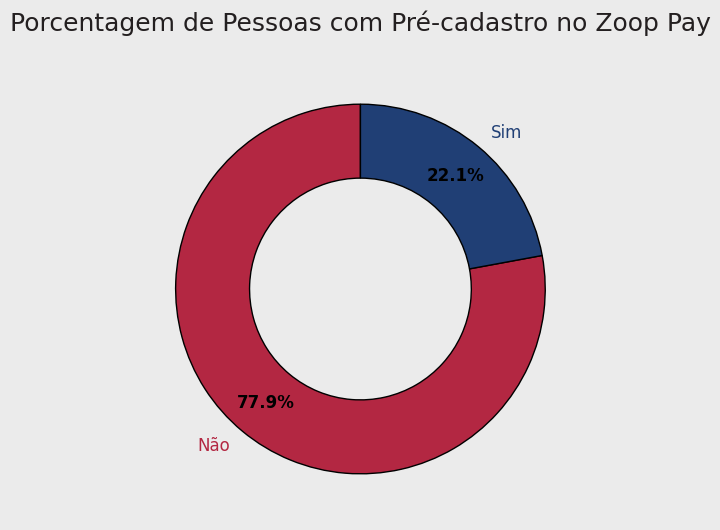

In [36]:
import matplotlib.pyplot as plt

# Contagem de pré-cadastro
pre_cadastro = zoop_pay['zoop_pay'].value_counts()

# Definição das cores (ordem deve bater com o índice)
cores = [
    AZUL_1 if label == 'Sim' else VERMELHO_3
    for label in pre_cadastro.index
]

# Criando figura e eixo
fig, ax = plt.subplots(figsize=(6, 6))

# Fundo da figura e do plot
fig.patch.set_facecolor(CINZA_1)
ax.set_facecolor(CINZA_1)

# Criando o gráfico de rosca
wedges, texts, autotexts = ax.pie(
    pre_cadastro.values,
    labels=pre_cadastro.index,
    colors=cores,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,
    wedgeprops={
        'width': 0.4,
        'edgecolor': 'black'
    }
)

# Ajustando rótulos das fatias
for text, wedge in zip(texts, wedges):
    text.set_fontsize(12)
    text.set_color(wedge.get_facecolor())

# Ajustando porcentagens
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')
    autotext.set_weight('bold')

# Título
ax.set_title(
    'Porcentagem de Pessoas com Pré-cadastro no Zoop Pay',
    fontsize=18,
    color=CINZA_5,
    pad=20
)

plt.show()
